In [ ]:
import matplotlib
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
import numpy as np
plots.style.use('fivethirtyeight')

## Central Limit Theorem (CLT)


### Distribution of the Sample Average

We look at the distribution of the average of several samples. </br>
If the sample size is large enough, the distribution will be roughly normal. 


In [ ]:
united = Table.read_table('united.csv')
united_bins = np.arange(-20, 300, 10)
united.hist('Delay', bins=united_bins)

In [ ]:
def one_sample_mean(sample_size):
    """Take a sample from the population of flights and compute its mean"""
    sampled_flights = united.sample(sample_size)
    return np.mean(sampled_flights.column('Delay'))

In [ ]:
def ten_thousand_sample_means(sample_size):
    """Use the bootstrap to approximate the distribution of the sample mean"""
    means = make_array()
    for i in np.arange(10000):
        mean = one_sample_mean(sample_size)
        means = np.append(means, mean)
    return means

In [ ]:
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)

In [ ]:
united.num_rows

In [ ]:
# How many possible sample means are there?
united.num_rows ** 400

### CLT: Center

The distribution of the sample average is roughly a bell
curve centered at the population average.

In [ ]:
delay_mean = np.average(united.column('Delay'))
sample_means_400 = ten_thousand_sample_means(400)
Table().with_column('Mean of 400 flight delays', sample_means_400).hist(bins=20)

# This code plots the location of the population average. Do not Edit. 
plots.scatter(delay_mean, -0.015, marker='^', color='red', s=100)

# This code displays the population average as text above the histogram. 
print('Population Average:', delay_mean)

### CLT: Variability of the Sample Average

***AKA The Spread***

The Spread is important because: <br>
● Along with the center, the spread helps identify exactly which normal curve is the distribution of the sample average. <br>
● The variability of the sample average helps us measure
how accurate the sample average is as an estimate of
the population average. <br>
● If we want a specified level of accuracy, understanding
the variability of the sample average helps us work out
how large our sample has to be. <br>
● The standard deviation is approximately equal to the standard deviation of the population divi


In [ ]:
sample_means_900 = ten_thousand_sample_means(900)


In [ ]:
means_tbl = Table().with_columns(
    '400', sample_means_400,
    '900', sample_means_900,
)

In [ ]:
means_tbl.hist(bins = np.arange(5, 31, 0.5))
plots.title('Distribution of Sample Average');

### Discussion Question

The gold histogram shows the distribution of __________
values, each of which is ________________________.

Fill in the blanks with the choices below. Which belongs in each blank? </br>
(a) 900 </br>
(b) 10,000 </br>
(c) a randomly sampled flight delay </br>
(d) an average of flight delays

## Quantifying the Effect of Sample Size

In [ ]:
delays = united.column('Delay')
delay_mean = np.mean(delays)
delay_sd = np.std(delays)
delay_mean, delay_sd

In [ ]:
"""Empirical distribution of random sample means"""

def plot_and_summarize_sample_means(sample_size):
    sample_means = ten_thousand_sample_means(sample_size)
    sample_means_tbl = Table().with_column('Sample Means', sample_means)
    
    # Print some information about the distribution of the sample means
    print("Sample size: ", sample_size)
    print("Population mean:", delay_mean)
    print("Average of sample means: ", np.mean(sample_means))
    print("\nPopulation SD:", delay_sd)
    print("SD of sample means:", np.std(sample_means))
    print("Ratio:", delay_sd / np.std(sample_means))

    # Plot a histogram of the sample means
    sample_means_tbl.hist(bins=20)
    plots.xlabel('Sample Means')
    plots.title('Sample Size ' + str(sample_size))

In [ ]:
plot_and_summarize_sample_means(100)

In [ ]:
plot_and_summarize_sample_means(400)

In [ ]:
plot_and_summarize_sample_means(900)

Compare the population mean and standard deviation to each sample mean and standard deviation. </br>
What do you notice?


### Central Limit Theorem

If the sample is large and drawn at random with
replacement,</br>
Then, regardless of the distribution of the population,</br>
The probability distribution of the sample average: </br>
    ● is ... </br>
    ● mean = ...</br> 
    ● SD = ... </br>
    
Compute the Standard Deviation for each sample size directly below.

In [ ]:
# Sample size of 100



In [ ]:
# Sample size of 400



In [ ]:
# Sample size of 900



### Discussion Question
A population has average 70 and SD 10. One of the
histograms below is the empirical distribution of the
averages of 10,000 random samples of size 100 drawn
from the population. Which one?
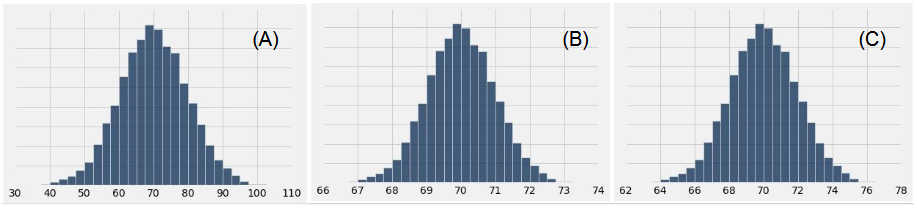

### Connecting to Confidence Intervals

For about ... of all samples, the sample average and population average are within 2 SDs of each other.</br>

Since the curve is approximately normal, the distance is ... . </br>

Total width of a 95% confidence interval for the population
average </br>
= ...  </br>
= ...
